In [ ]:
#Task 3: Customer Segmentation / Clustering

In [20]:
#Step 1: Data Preprocessing for Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

from sklearn.preprocessing import StandardScaler

# Scale features for clustering
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile[['total_spending', 'num_transactions', 'unique_products']])

# View scaled data
print(customer_profile_scaled[:5])


[[-0.06170143 -0.01145819  0.05004655]
 [-0.87774353 -0.46749414 -0.42420409]
 [-0.40585722 -0.46749414 -0.42420409]
 [ 1.03254704  1.35664965  1.47279848]
 [-0.78392861 -0.92353008 -0.89845473]]


C:\Users\ABHI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


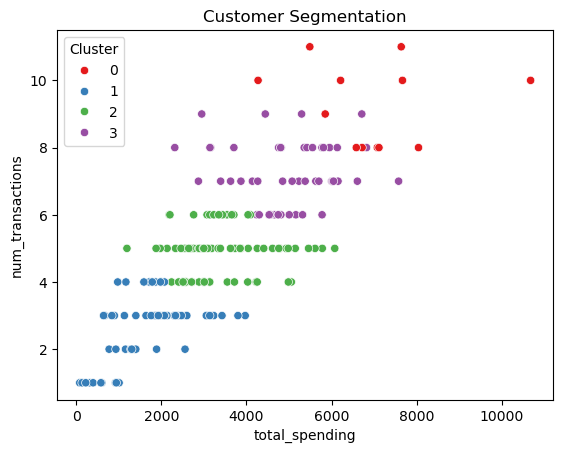

In [17]:
#Step 2: Choose a Clustering Algorithm
from sklearn.cluster import KMeans

# Apply K-Means clustering (you can experiment with different numbers of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile_scaled)

# Visualize clusters
sns.scatterplot(x=customer_profile['total_spending'], y=customer_profile['num_transactions'], hue=customer_profile['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.show()


In [18]:
#Step 3: Evaluate Clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(customer_profile_scaled, customer_profile['Cluster'])
print("Silhouette Score:", sil_score)

# Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(customer_profile_scaled, customer_profile['Cluster'])
print("DB Index:", db_index)


Silhouette Score: 0.37437823947162235
DB Index: 0.9182221873822776


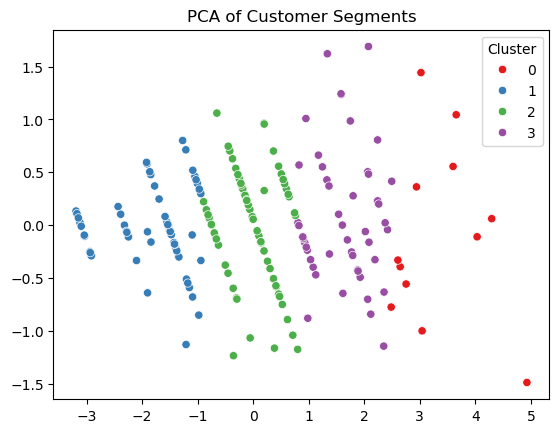

In [19]:
#Step 4: Visualize Clusters
# Visualizing using PCA for 2D representation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customer_profile_pca = pca.fit_transform(customer_profile_scaled)

sns.scatterplot(x=customer_profile_pca[:, 0], y=customer_profile_pca[:, 1], hue=customer_profile['Cluster'], palette='Set1')
plt.title('PCA of Customer Segments')
plt.show()
